In [1]:
#Importing the librabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
dataset =pd.read_csv(r"C:\Users\ADMIN\praju\sentiment resturant review analysis.csv")
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


### Data Preprocessing

In [3]:
df = dataset.copy()

In [4]:
df.head(5)


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [6]:
df.shape

(1000, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe()


,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [9]:
print(len(df))

1000


In [10]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

<Axes: >

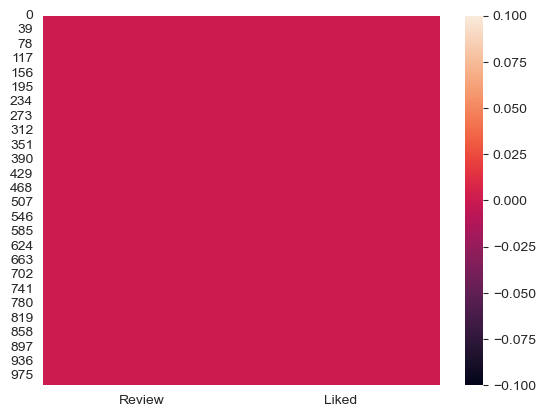

In [11]:
sns.heatmap(df.isnull())

In [12]:
print(df['Liked'].unique())

[1 0]


In [13]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [14]:
df['Liked'].nunique()

2

In [15]:
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<Axes: ylabel='Frequency'>

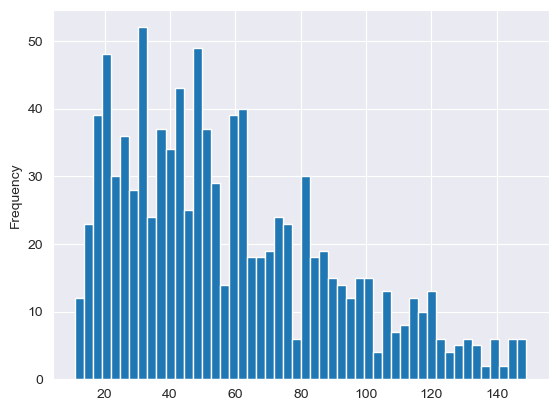

In [16]:
df['Length'].plot(bins=50, kind='hist') 

In [17]:
df[df['Length'] == 149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [18]:
df[df['Length'] == 11]['Review'].iloc[0]

'DELICIOUS!!'

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

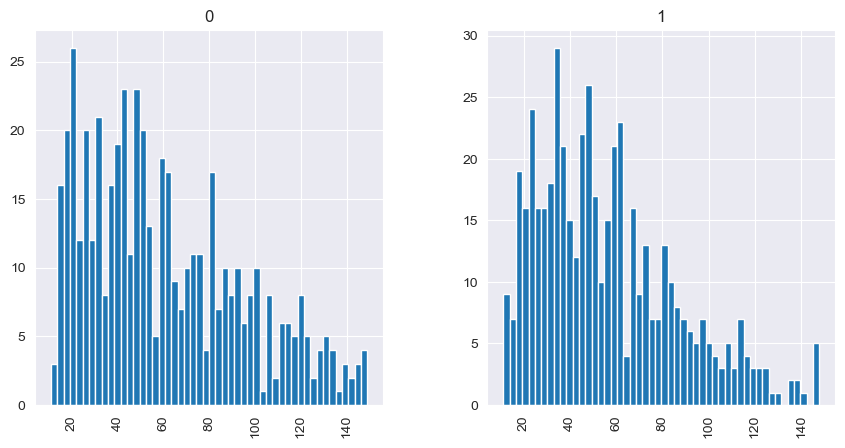

In [19]:
df.hist(column='Length', by='Liked', bins=50, figsize=(10,5))

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


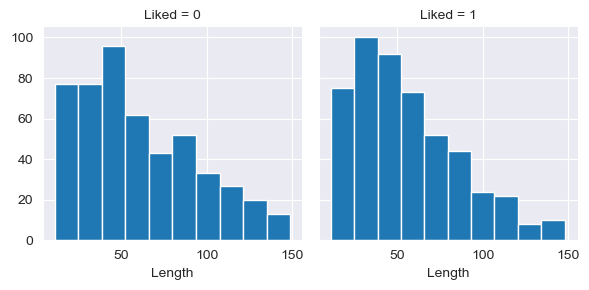

In [20]:
g = sns.FacetGrid(df,col='Liked')
g.map(plt.hist,'Length')

<Axes: xlabel='Liked', ylabel='count'>

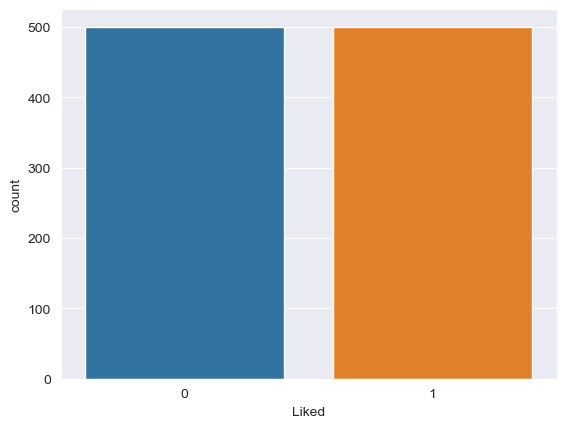

In [21]:
sns.countplot(x='Liked', data=df)

#### data is equally distributed between liked and disliked

### EDA

In [ ]:
Labels = pd.DataFrame(df['Liked'].value_counts()).reset_index()
Labels.columns = ['Liked','Count']
Labels['Liked'] = Labels['Liked'].map({0: 'Negative',1: 'Positive'})

fig = px.pie(Labels, values = 'Count', names = 'Liked', title='Percentage of reviews', hole=.4, color = 'Liked',
             width=800, height=400)
fig.show()


In [ ]:
#import nltk
#nltk.download()
#nltk.download('stopwords')

In [ ]:
import re 
import nltk
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    
    review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
    
    review = review.lower()
    
    review = review.split()
    
    ps = PorterStemmer()
    
    review = [ps.stem(word) for word in review if not word in set (stopwords.words('english'))]
    
    review = ' '.join(review)
    
    corpus.append(review)

In [ ]:
# lets check the corpus
corpus[0:5]

## Model Building 

### Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


### 1. Multinomial NB

In [ ]:
# multinomial NB
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


### 2. Bernoulli NB


In [ ]:
# BernoulliNB
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

### 3.logistic regresstion

In [ ]:
#logistic regresstion
# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

### 4.Decision Tree 

In [ ]:
# Decision tree classifier
#Fitting Decision tree to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

### 5.Support Vector Model

In [ ]:
# support vector model
# Fitting support vector model to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

### 6. Random Forest Classifier

In [ ]:
# Random Forest Classifier
# Fitting Random Forest Classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

### 7.Gaussian NB

In [ ]:
# Gaussian NB
# Fitting Gaussian NB to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))